**CO 1 -1) Implement the techniques to deal with outliers. -**

In [1]:
import sklearn
from sklearn.datasets import load_diabetes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
diabetics = load_diabetes()

# Create the dataframe
column_name = diabetics.feature_names
df_diabetics = pd.DataFrame(diabetics.data)
df_diabetics.columns = column_name
df_diabetics.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


<Axes: >

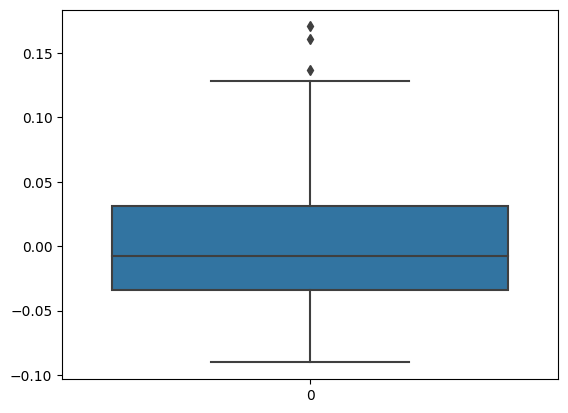

In [2]:
# Box Plot
import seaborn as sns
sns.boxplot(df_diabetics['bmi'])

In [3]:
# Position of the Outlier
import numpy as np
print(np.where(df_diabetics['bmi']>0.12))

(array([ 32, 145, 256, 262, 366, 367, 405]),)


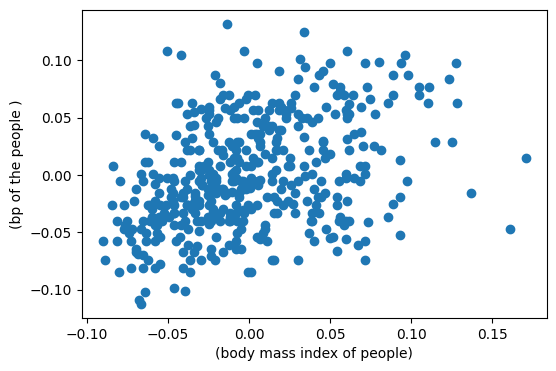

In [4]:
# Scatter plot
fig, ax = plt.subplots(figsize = (6,4))
ax.scatter(df_diabetics['bmi'],df_diabetics['bp'])

# x-axis label
ax.set_xlabel('(body mass index of people)')

# y-axis label
ax.set_ylabel('(bp of the people )')
plt.show()

In [5]:
# Position of the Outlier
print(np.where((df_diabetics['bmi']>0.12) & (df_diabetics['bp']<0.8)))

(array([ 32, 145, 256, 262, 366, 367, 405]),)


In [6]:
# Z score
from scipy import stats
import numpy as np

z = np.abs(stats.zscore(df_diabetics['age']))
print(z)

0      0.800500
1      0.039567
2      1.793307
3      1.872441
4      0.113172
         ...   
437    0.876870
438    0.115937
439    0.876870
440    0.956004
441    0.956004
Name: age, Length: 442, dtype: float64


Now to define an outlier threshold value is chosen which is generally 3.0. As 99.7% of the data points lie between +/- 3 standard deviation (using Gaussian Distribution approach).

Rows where Z value is greater than 2

In [7]:
threshold = 2

# Position of the outlier
print(np.where(z > 2))

(array([ 10,  26,  41,  77,  79, 106, 131, 204, 223, 226, 242, 311, 321,
       344, 374, 402]),)


In [8]:
Q1 = np.percentile(df_diabetics['bmi'], 25, method='midpoint')
Q3 = np.percentile(df_diabetics['bmi'], 75, method='midpoint')
IQR = Q3 - Q1
print(IQR)

0.06520763046978838


To define the outlier base value is defined above and below dataset’s normal range namely Upper and Lower bounds, define the upper and the lower bound (1.5*IQR value is considered) :

upper = Q3 +1.5*IQR

lower = Q1 – 1.5*IQR

In [9]:
upper=Q3+1.5*IQR
upper_array=np.array(df_diabetics['bmi']>=upper)
print("Upper Bound:",upper)
print(upper_array.sum())

#Below Lower bound
lower=Q1-1.5*IQR
lower_array=np.array(df_diabetics['bmi']<=lower)
print("Lower Bound:",lower)
print(lower_array.sum())

Upper Bound: 0.12879000811776306
3
Lower Bound: -0.13204051376139045
0


In [10]:
import sklearn
from sklearn.datasets import load_diabetes
import pandas as pd

# Load the dataset
diabetes = load_diabetes()

# Create the dataframe
column_name = diabetes.feature_names
df_diabetes = pd.DataFrame(diabetes.data)
df_diabetes .columns = column_name
df_diabetes .head()
print("Old Shape: ", df_diabetes.shape)

''' Detection '''
# IQR
# Calculate the upper and lower limits
Q1 = df_diabetes['bmi'].quantile(0.25)
Q3 = df_diabetes['bmi'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

# Create arrays of Boolean values indicating the outlier rows
upper_array = np.where(df_diabetes['bmi']>=upper)[0]
lower_array = np.where(df_diabetes['bmi']<=lower)[0]

# Removing the outliers
df_diabetes.drop(index=upper_array, inplace=True)
df_diabetes.drop(index=lower_array, inplace=True)

# Print the new shape of the DataFrame
print("New Shape: ", df_diabetes.shape)

Old Shape:  (442, 10)
New Shape:  (439, 10)


**CO-1 : 2) Implement the techniques to deal with missing values.**

In [11]:
df_diabetics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB


In [12]:
df_diabetics.isnull().sum()

age    0
sex    0
bmi    0
bp     0
s1     0
s2     0
s3     0
s4     0
s5     0
s6     0
dtype: int64

In [13]:
df_diabetics.dropna()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


All null and missing values are removed from the dataset appropriately

**CO-2: 3) Implement distance measuring techniques for two features of your dataset: (a) Euclidean (b)Minkowski (c) Manhattan (d) Jaccard (e) Cosine (f) Simple matching coefficient (g)hamming (distance libraries-numpy, scipy, math)**

In [14]:
import numpy as np
from scipy.spatial import distance
import math
from sklearn.datasets import load_iris

# Load the Iris dataset

X = diabetics.data  # Features
feature_names = diabetics.feature_names  # Feature names

# Select two features: Sepal Length (feature 0) and Sepal Width (feature 1)
feature1 = X[:, 0]
feature2 = X[:, 1]

# (a) Euclidean Distance
euclidean_dist = np.linalg.norm(feature1 - feature2)
p = 3
minkowski_dist = distance.minkowski(feature1, feature2, p=p)

# (c) Manhattan Distance
manhattan_dist = distance.cityblock(feature1, feature2)

# (d) Jaccard Distance (for binary data, e.g., sets)
# Since the features are continuous, Jaccard distance is not applicable here

# (e) Cosine Similarity (use 1 - Cosine similarity for Cosine distance)
cosine_dist = 1 - np.dot(feature1, feature2) / (np.linalg.norm(feature1) * np.linalg.norm(feature2))

# (f) Simple Matching Coefficient
# Since the features are continuous, SMC distance is not applicable here

# (g) Hamming Distance (for binary data, e.g., strings)
# Since the features are continuous, Hamming distance is not applicable here


# Print the calculated distances
print(f"(a) Euclidean Distance: {euclidean_dist:.2f}")
print(f"(b) Minkowski Distance (p={p}): {minkowski_dist:.2f}")
print(f"(c) Manhattan Distance: {manhattan_dist:.2f}")
print(f"(e) Cosine Distance: {cosine_dist:.2f}")



(a) Euclidean Distance: 1.29
(b) Minkowski Distance (p=3): 0.54
(c) Manhattan Distance: 21.73
(e) Cosine Distance: 0.83


Co 2 - 4

In [15]:
from sklearn.preprocessing import StandardScaler  # to standardize the features
from sklearn.decomposition import PCA  # to apply PCA
import seaborn as sns

In [16]:

#convert the dataset into a pandas data frame
df_diabetics = pd.DataFrame(diabetics['data'], columns = diabetics['feature_names'])
#display the head (first 5 rows) of the dataset
df_diabetics.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [17]:
#Standardize the features
#Create an object of StandardScaler which is present in sklearn.preprocessing
scalar = StandardScaler()
scaled_data = pd.DataFrame(scalar.fit_transform(df_diabetics)) #scaling the data
scaled_data

,0,1,2,3,4,5,6,7,8,9
0,0.800500,1.065488,1.297088,0.459841,-0.929746,-0.732065,-0.912451,-0.054499,0.418531,-0.370989
1,-0.039567,-0.938537,-1.082180,-0.553505,-0.177624,-0.402886,1.564414,-0.830301,-1.436589,-1.938479
2,1.793307,1.065488,0.934533,-0.119214,-0.958674,-0.718897,-0.680245,-0.054499,0.060156,-0.545154
3,-1.872441,-0.938537,-0.243771,-0.770650,0.256292,0.525397,-0.757647,0.721302,0.476983,-0.196823
4,0.113172,-0.938537,-0.764944,0.459841,0.082726,0.327890,0.171178,-0.054499,-0.672502,-0.980568
...,...,...,...,...,...,...,...,...,...,...
437,0.876870,1.065488,0.413360,1.256040,-0.119769,-0.053957,-0.602843,-0.054499,0.655787,0.151508
438,-0.115937,1.065488,-0.334410,-1.422086,1.037341,1.664355,-0.602843,0.721302,-0.380819,0.935254
439,0.876870,1.065488,-0.334410,0.363573,-0.785107,-0.290965,-0.525441,-0.232934,-0.985649,0.325674
440,-0.956004,-0.938537,0.821235,0.025550,0.343075,0.321306,-0.602843,0.558384,0.936163,-0.545154


<Axes: >

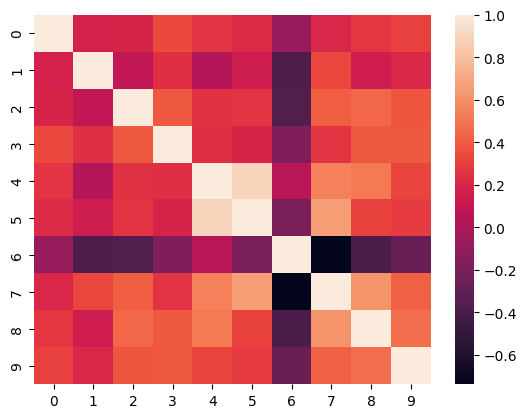

In [18]:
#Check the Co-relation between features without PCA
sns.heatmap(scaled_data.corr())

In [19]:
#Applying PCA
#Taking no. of Principal Components as 3
pca = PCA(n_components = 3)
pca.fit(scaled_data)
data_pca = pca.transform(scaled_data)
data_pca = pd.DataFrame(data_pca,columns=['PC1','PC2','PC3'])
data_pca.head()

,PC1,PC2,PC3
0,0.587199,-1.946832,0.589205
1,-2.831625,1.372082,0.027930
2,0.272129,-1.634901,0.739244
3,0.049281,0.382278,-2.013032
4,-0.756421,0.811960,-0.057238


<Axes: >

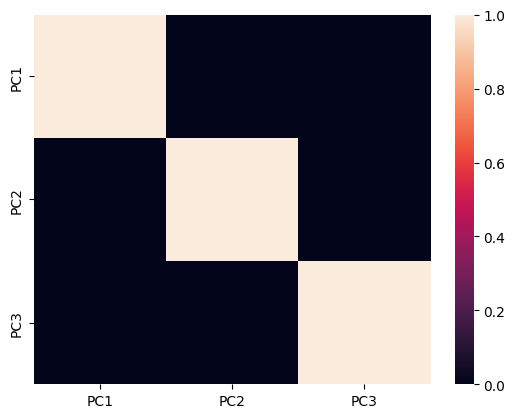

In [20]:
#Checking Co-relation between features after PCA
sns.heatmap(data_pca.corr())

The above heatmap clearly depicts that there is no correlation between various obtained principal components (PC1, PC2, and PC3). Thus, we have moved from higher dimensional feature space to a lower-dimensional feature space while ensuring that there is no correlation between the so obtained PCs is minimum. Hence, we have accomplished the objectives of PCA.

CO 3 - 5

In [21]:
from sklearn.model_selection import train_test_split
train , test = train_test_split(df_diabetics, test_size = 0.3)

x_train = train.drop('bmi', axis=1)
y_train = train['bmi']

x_test = test.drop('bmi', axis = 1)
y_test = test['bmi']

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test_scaled)

In [23]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(x_train, y_train)  #fit the model
    pred=model.predict(x_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 0.05509919299470546
RMSE value for k=  2 is: 0.047775268130826345
RMSE value for k=  3 is: 0.04624907435519585
RMSE value for k=  4 is: 0.044660191877523306
RMSE value for k=  5 is: 0.0441972203135449
RMSE value for k=  6 is: 0.043588241113632235
RMSE value for k=  7 is: 0.043033530430278515
RMSE value for k=  8 is: 0.04329738289139293
RMSE value for k=  9 is: 0.04347187643196096
RMSE value for k=  10 is: 0.042865890711177655
RMSE value for k=  11 is: 0.042210368805265706
RMSE value for k=  12 is: 0.042146543741455884
RMSE value for k=  13 is: 0.041553888240849886
RMSE value for k=  14 is: 0.041555773282321955
RMSE value for k=  15 is: 0.04096977554001949
RMSE value for k=  16 is: 0.04060217073870146
RMSE value for k=  17 is: 0.04018095893686695
RMSE value for k=  18 is: 0.040239416816126354
RMSE value for k=  19 is: 0.04008463229996075
RMSE value for k=  20 is: 0.03994220100864349


<Axes: >

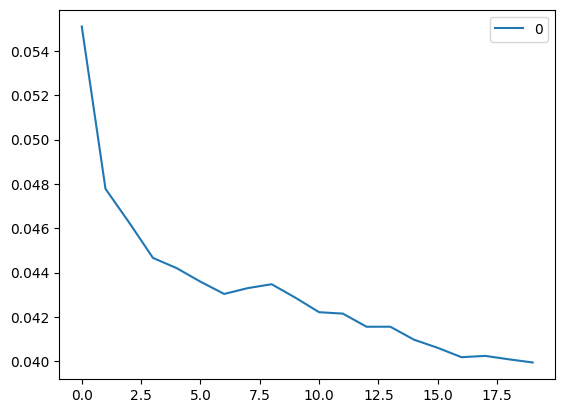

In [24]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve
curve.plot()

In [25]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(x_train,y_train)
model.best_params_

{'n_neighbors': 9}

CO 3 - 6 Implement a decision tree classification algorithm.


In [26]:
import numpy as nm
import matplotlib.pyplot as mtp
import pandas as pd


#importing datasets
data_set= df_diabetics

#convert y values to categorical values
data_set.loc[data_set['bp'] < 0, 'ctg'] = 0
data_set.loc[data_set['bp'] > 0, 'ctg'] = 1
#Extracting Independent and dependent Variable
x= data_set.iloc[:, [2,3]].values
y= data_set['ctg']
data_set

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,ctg
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,1.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,0.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,0.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,0.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,1.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,1.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,0.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,1.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,1.0


In [27]:
# Splitting the dataset into training and test set.
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0)

#feature Scaling
from sklearn.preprocessing import StandardScaler
st_x= StandardScaler()
x_train= st_x.fit_transform(x_train)
x_test= st_x.transform(x_test)
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn import utils


In [28]:
classifier= DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier.fit(x_train, y_train)
#Predicting the test set result
y_pred= classifier.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate a classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        62
         1.0       1.00      1.00      1.00        49

    accuracy                           1.00       111
   macro avg       1.00      1.00      1.00       111
weighted avg       1.00      1.00      1.00       111



CO 3 - 7 Implement a support vector machine algorithm.

In [29]:
from sklearn.svm import SVC

x= data_set.iloc[:, [2]].values
y= data_set['ctg'].to_numpy().reshape(-1,1)
# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create a Support Vector Machine (SVM) classifier
clf = SVC(kernel='linear', C=1, random_state=42)

# Train the classifier on the training data
clf.fit(x_train, y_train)

# Predict the classes for the test data
y_pred = clf.predict(y_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate a classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        57
         1.0       1.00      1.00      1.00        32

    accuracy                           1.00        89
   macro avg       1.00      1.00      1.00        89
weighted avg       1.00      1.00      1.00        89



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


CO 3 - 8 Implement regression algorithms: (a)linear regression

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
# loading the linear regression model
lin_reg_model = LinearRegression()

lin_reg_model.fit(x_train,y_train)
# prediction on Training data
training_data_prediction = lin_reg_model.predict(x_train)

# R squared Error
train_error_score = metrics.r2_score(y_train, training_data_prediction)
print("R squared Error - Training : ", train_error_score)

# prediction on Training data
y_pred = lin_reg_model.predict(x_test)

test_error_score = metrics.r2_score(y_test, y_pred)
print("R squared Error - Test: ", test_error_score)

R squared Error - Training :  0.08682211246902727
R squared Error - Test:  0.1324862483370295


<Axes: >

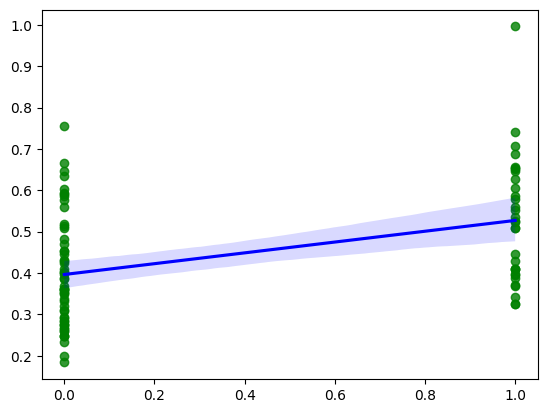

In [31]:
# create scatterplot with regression line
import seaborn as sns
sns.regplot(x=y_test, y=y_pred, scatter_kws={"color": "green"}, line_kws={"color": "blue"})

(b)logistic regression

In [32]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Load the dataset
diabetics = load_diabetes()
x= data_set.iloc[:, [3,4,5,9]].values
y= data_set['ctg']

# splitting X and y into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.4,random_state=1)

# LogisticRegression
clf = LogisticRegression(random_state=0)
clf.fit(x_train, y_train)
# Prediction
y_pred = clf.predict(x_test)

acc = accuracy_score(y_test, y_pred)
print("Logistic Regression model accuracy (in %):", acc*100)

Logistic Regression model accuracy (in %): 86.4406779661017


In [35]:
pip install scikit-learn-extra

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 9.6 MB/s eta 0:00:00


CO 4 - 9 Implement k-means/k-medoid clustering algorithms and do prediction for unknown data.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


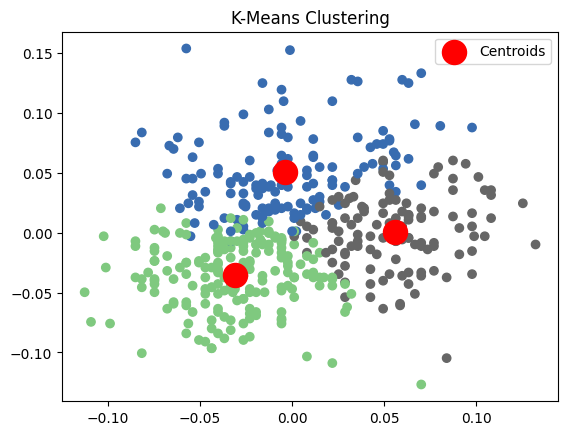

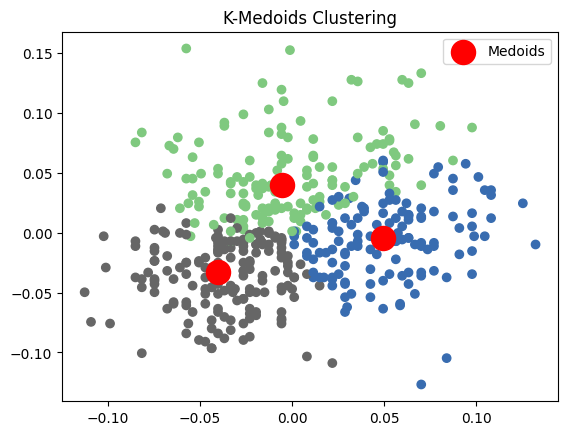

K-Means Prediction for Unknown Data: [1 2]
K-Medoids Prediction for Unknown Data: [0 1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [36]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
X = data_set.iloc[:,3:6]  # Features

# Perform K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# Perform K-Medoids clustering
kmedoids = KMedoids(n_clusters=3, random_state=42)
kmedoids.fit(X)

# Predict clusters for the data points
kmeans_labels = kmeans.predict(X)
kmedoids_labels = kmedoids.predict(X)

# Visualize the clusters for K-Means
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=kmeans_labels,cmap='Accent')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.title('K-Means Clustering')
plt.legend()
plt.show()

# Visualize the clusters for K-Medoids
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=kmedoids_labels,cmap='Accent')
plt.scatter(kmedoids.cluster_centers_[:, 0], kmedoids.cluster_centers_[:, 1], s=300, c='red', label='Medoids')
plt.title('K-Medoids Clustering')
plt.legend()
plt.show()

# Predict clusters for unknown data points
unknown_data = np.array([[-0.001,0.102,0.005], [0.0912,0.00234,-0.0054]])  # Replace with your own data
kmeans_prediction = kmeans.predict(unknown_data)
kmedoids_prediction = kmedoids.predict(unknown_data)

print("K-Means Prediction for Unknown Data:", kmeans_prediction)
print("K-Medoids Prediction for Unknown Data:", kmedoids_prediction)

CO 4 - 10 Implement hierarchical clustering algorithms and do prediction for unknown data.

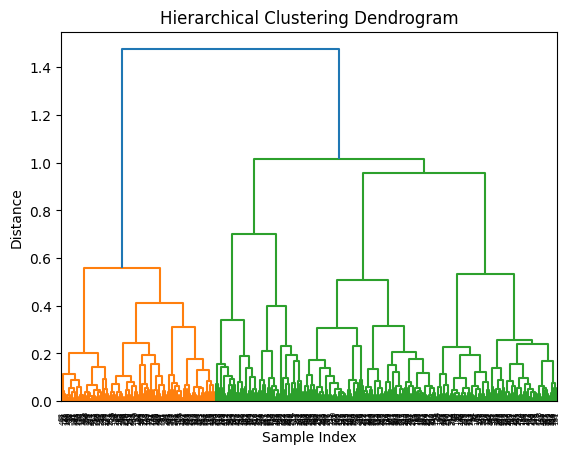

In [37]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
# Perform hierarchical clustering
linkage_matrix = linkage(x, method='ward', metric='euclidean')

# Create a dendrogram
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

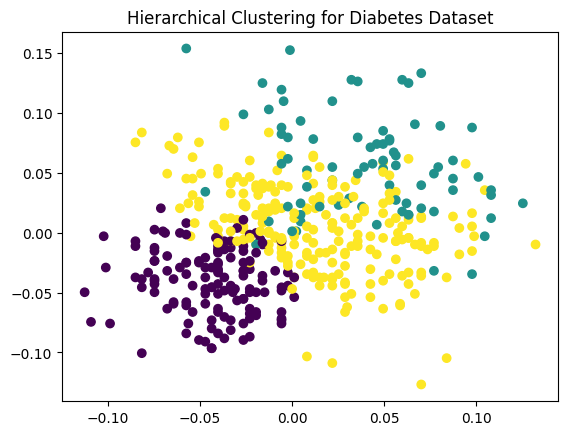

In [38]:
# Determine the number of clusters using the dendrogram
num_clusters = 3  # Adjust this based on the dendrogram

# Perform clustering to assign data points to clusters
clusters = fcluster(linkage_matrix, t=num_clusters, criterion='maxclust')

# Visualize the clusters for the Iris dataset
plt.scatter(x[:, 0], x[:, 1], c=clusters, cmap='viridis')
plt.title('Hierarchical Clustering for Diabetes Dataset')
plt.show()

In [39]:
# Predict clusters for unknown data points
unknown_data = np.array([[0.0002, -0.232, 0.094, -0.2], [-0.0002,0.408,0.008,-0.02]])  # Replace with your own data

# Rebuild the linkage matrix with the unknown data points
linkage_matrix_unknown = linkage(unknown_data, method='ward', metric='euclidean')

# Assign clusters to the unknown data points
unknown_clusters = fcluster(linkage_matrix, t=num_clusters, criterion='maxclust')

print("Clusters for Unknown Data:", unknown_clusters)

Clusters for Unknown Data: [3 3 1 3 3 1 1 2 1 1 3 3 3 3 3 2 3 3 1 3 1 3 3 2 1 1 1 1 1 3 3 1 3 1 1 3 3
 1 2 1 2 1 1 1 3 3 1 1 3 3 3 3 3 3 3 1 1 1 3 3 1 1 1 3 1 3 1 1 1 1 3 2 2 3
 2 1 3 1 1 3 2 3 3 1 1 3 1 3 1 1 1 3 3 1 3 1 3 3 3 3 3 3 3 3 3 1 1 3 3 2 1
 3 3 2 3 3 3 2 2 3 3 3 2 2 3 1 1 3 3 2 2 1 3 1 3 1 1 3 2 3 3 2 2 3 3 3 3 3
 3 1 3 3 2 3 3 2 1 3 1 3 1 2 1 3 3 1 1 2 2 3 1 1 2 1 1 1 3 3 3 3 3 3 2 3 3
 3 3 1 2 3 3 1 3 3 3 3 3 3 1 3 3 1 2 2 3 3 3 3 2 3 3 3 2 1 1 2 2 2 3 1 1 1
 3 1 1 3 1 3 1 1 2 3 3 1 2 3 2 1 3 3 3 2 1 3 1 1 3 3 2 3 3 2 3 2 2 1 1 3 3
 3 1 3 3 1 1 3 3 3 2 3 3 3 1 2 3 3 2 1 1 3 3 1 2 1 3 3 1 2 3 3 3 3 1 3 3 1
 1 1 1 1 1 3 3 3 2 3 3 2 1 2 3 3 3 3 3 3 3 2 3 3 2 2 2 2 2 3 1 3 1 3 3 1 3
 3 1 3 3 3 3 3 3 3 3 3 3 3 2 1 3 1 2 1 1 3 2 3 3 3 1 3 3 3 3 3 2 2 3 3 2 1
 1 3 3 1 1 2 2 3 3 3 3 1 1 1 2 3 1 1 3 1 2 1 2 1 3 3 1 1 3 3 3 1 3 3 3 3 1
 3 2 2 3 1 2 1 2 3 3 1 2 1 2 3 2 3 1 1 2 1 2 3 3 3 2 3 3 1 1 3 3 3 3 3]


CO 4 - 11

In [40]:
from sklearn.cluster import DBSCAN
x = df_diabetics.loc[:, ['age',
                 'sex']].values
# cluster the data into five clusters



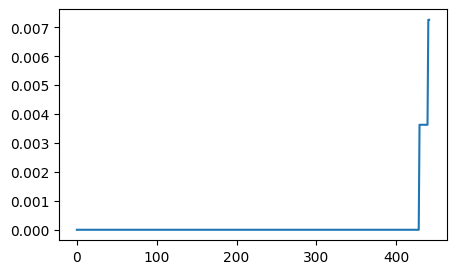

In [41]:
from sklearn.neighbors import NearestNeighbors # importing the library
neighb = NearestNeighbors(n_neighbors=2) # creating an object of the NearestNeighbors class
nbrs=neighb.fit(x) # fitting the data to the object
distances,indices=nbrs.kneighbors(x) # finding the nearest neighbours
distances = np.sort(distances, axis = 0) # sorting the distances
distances = distances[:, 1] # taking the second column of the sorted distances
plt.rcParams['figure.figsize'] = (5,3) # setting the figure size
plt.plot(distances) # plotting the distances
plt.show() # showing the plot

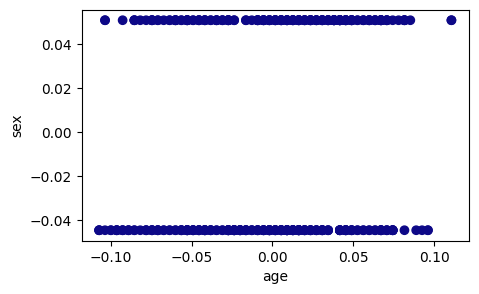

In [42]:
dbscan = DBSCAN(eps = 12.7, min_samples = 4).fit(x) # fitting the model
labels = dbscan.labels_ # getting the labels
# Plot the clusters
plt.scatter(x[:, 0], x[:,1], c = labels, cmap= "plasma") # plotting the clusters
plt.xlabel("age") # X-axis label
plt.ylabel("sex") # Y-axis label
plt.show() # showing the plot

CO 4 - 12

In [43]:
pip install apyori

  Preparing metadata (setup.py) ... done
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5954 sha256=7ff6f74e6bec64c39880efdfff26c9a8e38d865ec387146b502df338cf2f3756
  Stored in directory: /root/.cache/pip/wheels/c4/1a/79/20f55c470a50bb3702a8cb7c94d8ada15573538c7f4baebe2d
Successfully built apyori


In [44]:
pip install efficient_apriori

In [45]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
df_diabetics.shape

(442, 11)

In [46]:
transactions=[]
for i in range(0, 442):
    transactions.append([str(df_diabetics.values[i,j])  for j in range(0,11)])



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [47]:
from apyori import apriori
rules= apriori(transactions= transactions, min_support=0.003, min_confidence = 0.2, min_lift=3, min_length=2, max_length =2)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [48]:
results= list(rules)
results

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[RelationRecord(items=frozenset({'-0.00019300696201012598', '-0.012556124244455912'}), support=0.004524886877828055, ordered_statistics=[OrderedStatistic(items_base=frozenset({'-0.00019300696201012598'}), items_add=frozenset({'-0.012556124244455912'}), confidence=0.33333333333333337, lift=13.393939393939396)]),
 RelationRecord(items=frozenset({'-0.00019300696201012598', '0.07072992627467027'}), support=0.004524886877828055, ordered_statistics=[OrderedStatistic(items_base=frozenset({'-0.00019300696201012598'}), items_add=frozenset({'0.07072992627467027'}), confidence=0.33333333333333337, lift=18.416666666666668), OrderedStatistic(items_base=frozenset({'0.07072992627467027'}), items_add=frozenset({'-0.00019300696201012598'}), confidence=0.25, lift=18.416666666666668)]),
 RelationRecord(items=frozenset({'0.03564378941743375', '-0.0006117353045626216'}), support=0.004524886877828055, ordered_statistics=[OrderedStatistic(items_base=frozenset({'-0.0006117353045626216'}), items_add=frozenset(

In [49]:
for item in results:
    pair = item[0]
    items = [x for x in pair]
    print("Rule: " + items[0] + " -> " + items[1])

    print("Support: " + str(item[1]))
    print("Confidence: " + str(item[2][0][2]))
    print("Lift: " + str(item[2][0][3]))
    print("=====================================")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Rule: -0.00019300696201012598 -> -0.012556124244455912
Support: 0.004524886877828055
Confidence: 0.33333333333333337
Lift: 13.393939393939396
Rule: -0.00019300696201012598 -> 0.07072992627467027
Support: 0.004524886877828055
Confidence: 0.33333333333333337
Lift: 18.416666666666668
Rule: 0.03564378941743375 -> -0.0006117353045626216
Support: 0.004524886877828055
Confidence: 0.33333333333333337
Lift: 21.04761904761905
Rule: -0.009824676969417972 -> -0.0010007289644291908
Support: 0.004524886877828055
Confidence: 0.4
Lift: 25.25714285714286
Rule: -0.010903250651210127 -> -0.0010776975004659671
Support: 0.004524886877828055
Confidence: 0.33333333333333337
Lift: 7.754385964912282
Rule: -0.020217511096257485 -> -0.0010776975004659671
Support: 0.004524886877828055
Confidence: 0.33333333333333337
Lift: 7.754385964912282
Rule: -0.030747917533098208 -> -0.0010776975004659671
Support: 0.004524886877828055
Confidence: 0.2
Lift: 4.652631578947369
Rule: -0.07452744180974262 -> -0.0010776975004659671

co 4 - 13 Implement backpropagation neural network algorithm.


In [50]:
import numpy as np
class Network:
    def __init__(self, structure):
        self.structure = structure
        self.num_layers = len(structure)
        self.Bₙ = [np.random.randn(l, 1) for l in structure[1:]]

        self.Wₙ = [np.random.randn(l, next_l)
                   for l, next_l in zip(structure[:-1], structure[1:])]

    def backprop(self, x, y):
        მJⳆმBₙₛ = [np.zeros(b.shape) for b in self.Bₙ]
        მJⳆმWₙₛ = [np.zeros(W.shape) for W in self.Wₙ]

        Zₙ = []
        Aₙ = []
        for b, W in zip(self.Bₙ, self.Wₙ):
            z = W.T @ a + b if Zₙ else W.T @ x + b
            a = σ(z)
            Zₙ.append(z)
            Aₙ.append(a)

        H = self.num_layers-2
        for L in range(H, -1, -1):
            δ =  σࠤ(Zₙ[L]) * (self.Wₙ[L+1] @ δ) if L != H else ᐁC(Aₙ[L], y) * σࠤ(Zₙ[L])
            მJⳆმBₙₛ[L] = δ
            მJⳆმWₙₛ[L] = Aₙ[L-1] @ δ.T if L != 0 else x @ δ.T

        return (მJⳆმBₙₛ, მJⳆმWₙₛ)

    def gradient_descent(self, mini_batch, λ):
        მJⳆმBₙ= [np.zeros(b.shape) for b in self.Bₙ]
        მJⳆმWₙ = [np.zeros(W.shape) for W in self.Wₙ]

        for x, y in mini_batch:
            მJⳆმBₙₛ, მJⳆმWₙₛ = self.backprop(x, y)
            მJⳆმBₙ = [მJⳆმb + მJⳆმbₛ for მJⳆმb, მJⳆმbₛ in zip(მJⳆმBₙ, მJⳆმBₙₛ)]
            მJⳆმWₙ = [მJⳆმW + მJⳆმWₛ for მJⳆმW, მJⳆმWₛ in zip(მJⳆმWₙ, მJⳆმWₙₛ)]

        d = len(mini_batch)
        self.Wₙ = [W - λ/d * მJⳆმW for W, მJⳆმW in zip(self.Wₙ, მJⳆმWₙ)]
        self.Bₙ = [b - λ/d * მJⳆმb for b, მJⳆმb in zip(self.Bₙ, მJⳆმBₙ)]

    def train(self, epochs, training_data, λ):
        for j in range(epochs):
            for mini_batch in training_data:
                self.gradient_descent(mini_batch, λ)



def ᐁC(aᴺ, y):
    return (aᴺ-y)                 #so we can easily change the cost.


def σ(z):
    return 1.0/(1.0+np.exp(-z))


def σࠤ(z):
    return σ(z)*(1-σ(z))


my_net = Network([3, 2 ,2])
print("Initial Weights:")
print(my_net.Wₙ[0])
#the following generates a list of cnt vectors of length dim.
random_vectors = lambda dim, cnt: [np.random.rand(dim, 1) for i in range(cnt)]
random_batch= list(zip(random_vectors(3, 64) , random_vectors(2, 64)))
my_net.gradient_descent(random_batch, 3.0)
print("Optimized Weights:")
print(my_net.Wₙ[0])

Initial Weights:
[[ 1.63913548  2.96531837]
 [-0.5919035   1.35047125]
 [ 0.01281846 -0.05482231]]
Optimized Weights:
[[ 1.62299319  2.96355539]
 [-0.60569373  1.34844833]
 [-0.00816909 -0.05774365]]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


CO 5- 14

co 5- 15 Write any deep learning program of your choice.



We will build a simple Artificial Neural network using Keras

In [62]:
#https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database
import pandas as pd
from google.colab import files
uploaded = files.upload()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Saving diabetes.csv to diabetes (4).csv


In [63]:
import io
data = pd.read_csv(io.BytesIO(uploaded['diabetes (4).csv']))
print(data)
x = data.drop("Outcome", axis=1)
y = data["Outcome"]
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(12, input_dim=8, activation="relu"))
model.add(Dense(12, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
#Compile The Keras Model
"""When we are compiling the model we must specify some additional parameters to better evaluate the model and to find the best set of weights to map
inputs to outputs.
1)Loss Function – one must specify the loss function to evaluate the set of weights on which model will be mapped. we will use cross-entropy as a loss
function which is actually known as binary cross-entropy used for binary classification.
2)Optimizer – second is the optimizer to optimize the loss. we will use adam which is a popular version of gradient descent and gives the best result
in most problems."""
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
#Start Training (Fit the Model)
model.fit(x,y, epochs=150, batch_size=10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

In [64]:
# Evaluate the Model
_,accuracy = model.evaluate(x, y)
print("Model accuracy: %.2f"% (accuracy*100))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


24/24 [==============================] - 0s 2ms/step - loss: 0.5090 - accuracy: 0.7656
Model accuracy: 76.56


In [65]:
#Making Predictions
predictions = model.predict(x)
print([round(x[0]) for x in predictions])

24/24 [==============================] - 0s 1ms/step
[1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [66]:
model = Sequential()  #define model
model.add(Dense(12, input_dim=8, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"]) #compile model
model.fit(x,y, epochs=150, batch_size=10)  #training
_, accuracy = model.evaluate(x,y)    #testing
print("Model accuracy: %.2f"% (accuracy*100))
predictions = model.predict(x)     #make predictions
#round the prediction
rounded = [round(x[0]) for x in predictions]

Epoch 1/150


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


77/77 [==============================] - 1s 2ms/step - loss: 4.3465 - accuracy: 0.6029
Epoch 2/150
77/77 [==============================] - 0s 2ms/step - loss: 1.5622 - accuracy: 0.6263
Epoch 3/150
77/77 [==============================] - 0s 2ms/step - loss: 1.1908 - accuracy: 0.6133
Epoch 4/150
77/77 [==============================] - 0s 2ms/step - loss: 1.0427 - accuracy: 0.6302
Epoch 5/150
77/77 [==============================] - 0s 2ms/step - loss: 0.8328 - accuracy: 0.6367
Epoch 6/150
77/77 [==============================] - 0s 2ms/step - loss: 0.7330 - accuracy: 0.6250
Epoch 7/150
77/77 [==============================] - 0s 2ms/step - loss: 0.6816 - accuracy: 0.6367
Epoch 8/150
77/77 [==============================] - 0s 2ms/step - loss: 0.6834 - accuracy: 0.6198
Epoch 9/150
77/77 [==============================] - 0s 2ms/step - loss: 0.6534 - accuracy: 0.6523
Epoch 10/150
77/77 [==============================] - 0s 2ms/step - loss: 0.6425 - accuracy: 0.6641
Epoch 11/150
77/77 [=